In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

[Image Processing 101](https://piratefsh.github.io/image-processing-101/)

# 使用opencv进行仿射变换，主要设计cv2.wrapAffine和cv2.warpPerspective

In [2]:
# cv2.warpAffine?
# cv2.warpPerspective?
# cv2.resize?
# cv2.getRotationMatrix2D?
# cv2.line?
# cv2.threshold?

In [3]:
img_src_bgr = cv2.imread('../../data/lena.jpg')

In [4]:
height, width, channel = img_src_bgr.shape

In [5]:
# cv2.resize尺度变换，输入愿图像+(img_resize_height, img_resize_width)+interpolation插值方法
img_src_bgr_resize_half = cv2.resize(img_src_bgr, (height/2, width/2), interpolation=cv2.INTER_LINEAR)

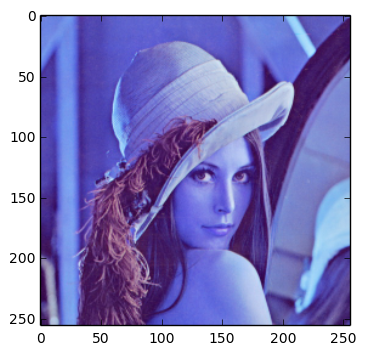

In [6]:
plt.imshow(img_src_bgr_resize_half)

# 图像平移
原图像$(x,y)$转换为$(\hat{x}, \hat{y}$，其中$\hat{x}=x+t_x$，$\hat{y}=y+t_y$，通过变换矩阵为$M$，同时矩阵变换$dst(x, y) = src(M_{11}x + M_{12}y + M_{13}, M_{21}x + M_{22}y + M_{23})$，那么平移矩阵为$M_x=\{0, 0, t_x\}，M_y=\{0, 0, t_y\}$

('M.shape:', (2, 3))


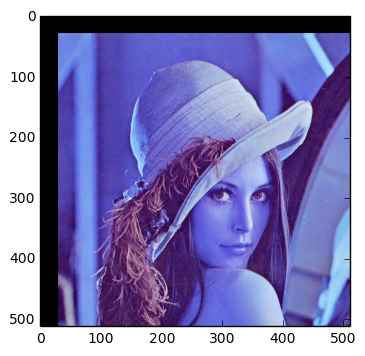

In [7]:
tx = 30
ty = 30
M = np.array([[1, 0, tx], [0, 1, ty]], dtype=np.float32) # 变换矩阵需要数据类型为np.float32
print('M.shape:', M.shape)
img_dst_bgr = cv2.warpAffine(img_src_bgr, M, (height, width))
plt.imshow(img_dst_bgr)

# 使用cv2.getRotationMatrix2D获得旋转矩阵，参数包括旋转中心，旋转角度，旋转后变换尺度

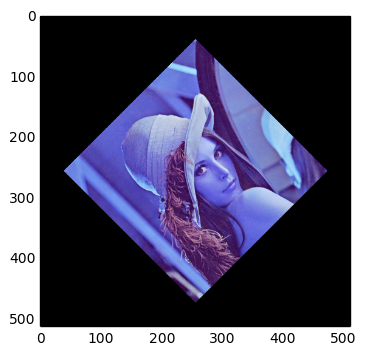

In [8]:
M=cv2.getRotationMatrix2D((width/2, height/2), 45, 0.6)
# print('M:', M)
# print('M.shape:', M.shape)
img_dst_bgr = cv2.warpAffine(img_src_bgr, M, (height, width))
plt.imshow(img_dst_bgr)

# 仿射变换中，原图中所有的平行线在结果图像中同样平行，使用cv2.getAffineTransform获得变换矩阵，同时使用cv2.warpAffine

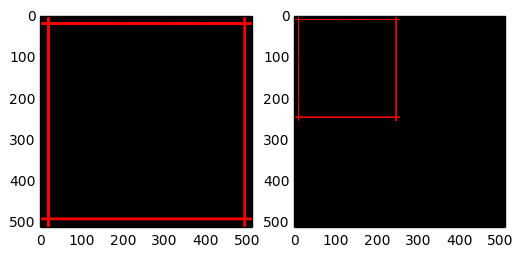

In [9]:
rect_length = 20
img_rect = np.zeros((width, height, channel), dtype=np.uint8)

# 第一条横线
start_point = (0, rect_length)
end_point = (width, rect_length)
line_color = (255, 0, 0) # RGB颜色
line_thick = 5
cv2.line(img_rect, start_point, end_point, line_color, line_thick)

# 第二条横线
start_point = (0, height-rect_length)
end_point = (width, height-rect_length)
line_color = (255, 0, 0) # RGB颜色
line_thick = 5
cv2.line(img_rect, start_point, end_point, line_color, line_thick)

# 第一条竖线
start_point = (rect_length, 0)
end_point = (rect_length, height)
line_color = (255, 0, 0) # RGB颜色
line_thick = 5
cv2.line(img_rect, start_point, end_point, line_color, line_thick)

# 第二条竖线
start_point = (width-rect_length, 0)
end_point = (width-rect_length, height)
line_color = (255, 0, 0) # RGB颜色
line_thick = 5
cv2.line(img_rect, start_point, end_point, line_color, line_thick)

pts1 = np.float32([[rect_length, rect_length], [rect_length, height-rect_length], [width-rect_length, rect_length]])
pts2 = np.float32([[rect_length/2, rect_length/2], [rect_length/2, (height-rect_length)/2], [(width-rect_length)/2, rect_length/2]])

M = cv2.getAffineTransform(pts1,pts2)

img_rect_affine = cv2.warpAffine(img_rect, M, (height, width))

plt.subplot(121)
plt.imshow(img_rect)
plt.subplot(122)
plt.imshow(img_rect_affine)

# 透视变换，需要一个3x3变换矩阵，变换前后直线还是直线，构建这个变换矩阵，需要4个点，以及它们在输出图像上对应的位置。

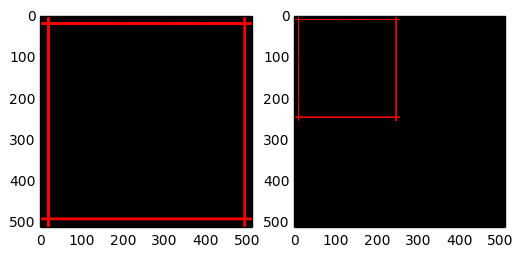

In [10]:
rect_length = 20
img_rect = np.zeros((width, height, channel), dtype=np.uint8)

# 第一条横线
start_point = (0, rect_length)
end_point = (width, rect_length)
line_color = (255, 0, 0) # RGB颜色
line_thick = 5
cv2.line(img_rect, start_point, end_point, line_color, line_thick)

# 第二条横线
start_point = (0, height-rect_length)
end_point = (width, height-rect_length)
line_color = (255, 0, 0) # RGB颜色
line_thick = 5
cv2.line(img_rect, start_point, end_point, line_color, line_thick)

# 第一条竖线
start_point = (rect_length, 0)
end_point = (rect_length, height)
line_color = (255, 0, 0) # RGB颜色
line_thick = 5
cv2.line(img_rect, start_point, end_point, line_color, line_thick)

# 第二条竖线
start_point = (width-rect_length, 0)
end_point = (width-rect_length, height)
line_color = (255, 0, 0) # RGB颜色
line_thick = 5
cv2.line(img_rect, start_point, end_point, line_color, line_thick)

pts1 = np.float32([[rect_length, rect_length], [rect_length, height-rect_length], [width-rect_length, rect_length], [width-rect_length, height-rect_length]])
pts2 = np.float32([[rect_length/2, rect_length/2], [rect_length/2, (height-rect_length)/2], [(width-rect_length)/2, rect_length/2], [(width-rect_length)/2, (height-rect_length)/2]])

M = cv2.getPerspectiveTransform(pts1,pts2)

img_rect_affine = cv2.warpPerspective(img_rect, M, (height, width))

plt.subplot(121)
plt.imshow(img_rect)
plt.subplot(122)
plt.imshow(img_rect_affine)

# 图像阈值化，包括简单阈值，自适应阈值，Otsu's二值化

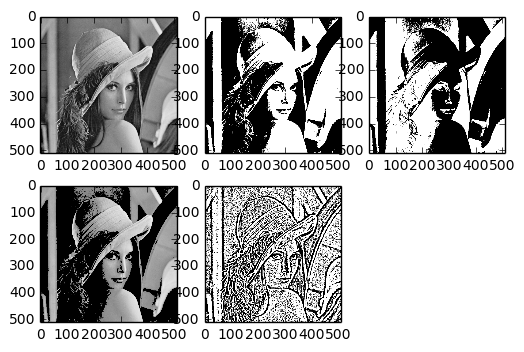

In [11]:
img_src_gray = cv2.cvtColor(img_src_bgr, cv2.COLOR_BGR2GRAY)
thresh=127
maxval=255
_, img_src_gray_thresh_binary = cv2.threshold(img_src_gray, thresh, maxval, cv2.THRESH_BINARY)
_, img_src_gray_thresh_binary_inv = cv2.threshold(img_src_gray, thresh, maxval, cv2.THRESH_BINARY_INV)
_, img_src_gray_thresh_tozero = cv2.threshold(img_src_gray, thresh, maxval, cv2.THRESH_TOZERO)
# block_size = 11, thresh_C = 2
block_size = 11
thresh_C = 2
img_src_gray_adaptive_thresh = cv2.adaptiveThreshold(img_src_gray, maxval, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, thresh_C)

plt.subplot(231)
plt.imshow(img_src_gray, cmap='gray')
plt.subplot(232)
plt.imshow(img_src_gray_thresh_binary, cmap='gray')
plt.subplot(233)
plt.imshow(img_src_gray_thresh_binary_inv, cmap='gray')
plt.subplot(234)
plt.imshow(img_src_gray_thresh_tozero, cmap='gray')
plt.subplot(235)
plt.imshow(img_src_gray_adaptive_thresh, cmap='gray')